In [89]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv("bank.csv")
df.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [91]:
df.drop(["marital", "contact", "day","month","pdays","previous","deposit"], axis=1, inplace = True)
df.head()

,age,job,education,balance,housing,loan,duration,campaign
0,59,admin.,secondary,2343,yes,no,1042,1
1,56,admin.,secondary,45,no,no,1467,1
2,41,technician,secondary,1270,yes,no,1389,1
3,55,services,secondary,2476,yes,no,579,1
4,54,admin.,tertiary,184,no,no,673,2


In [92]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,age,job,education,balance,housing,loan,duration,campaign
Dtypes,int64,object,object,int64,object,object,int64,int64
Num_Uniqe,76,12,4,3805,2,2,1428,36


In [93]:
cols = [ "housing", "loan","education"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,age,job,education,balance,housing,loan,duration,campaign
0,int64,object,category,int64,category,category,int64,int64


In [94]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,age,job,education,balance,housing,loan,duration,campaign
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['age', 'balance', 'duration', 'campaign'], dtype='object')

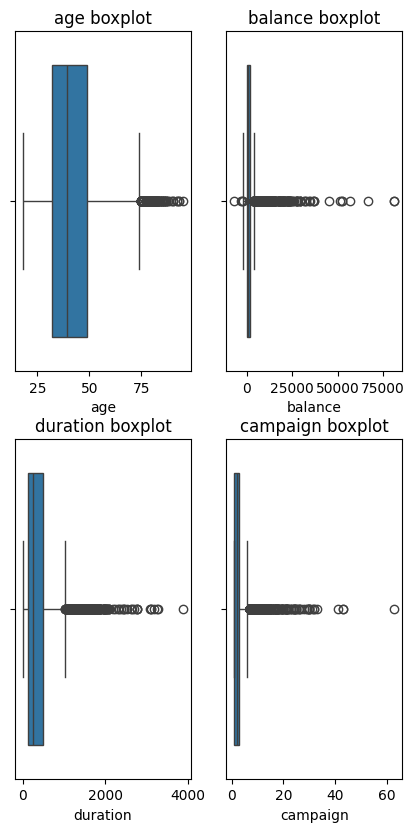

In [96]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(5, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

In [97]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

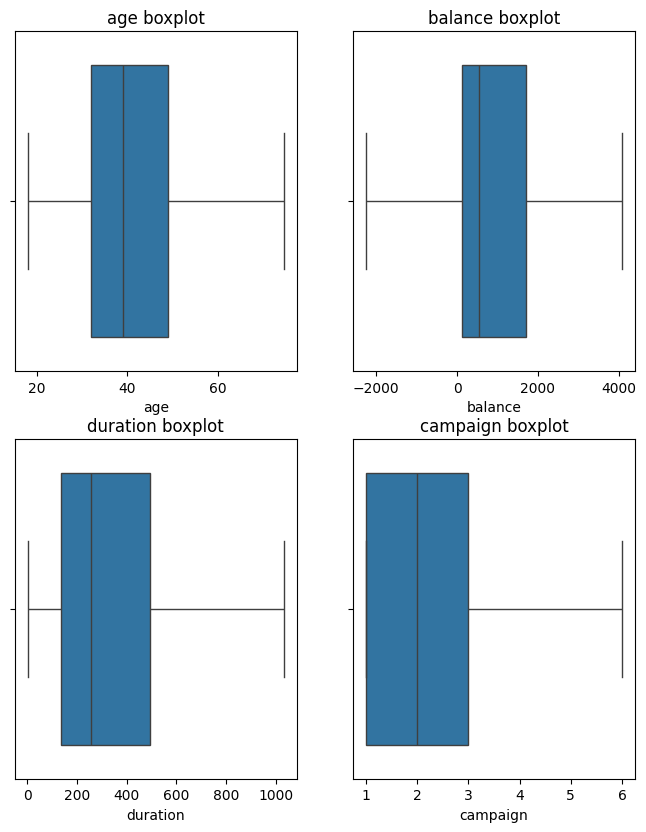

In [98]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

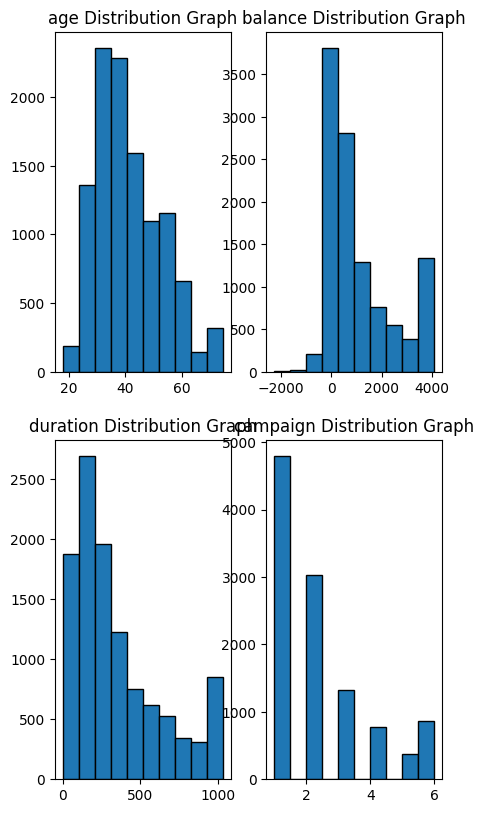

In [99]:
# Histogram
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(5, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    plt.hist(df[col], edgecolor="black")
    plt.title(f"{col} Distribution Graph")
plt.show()

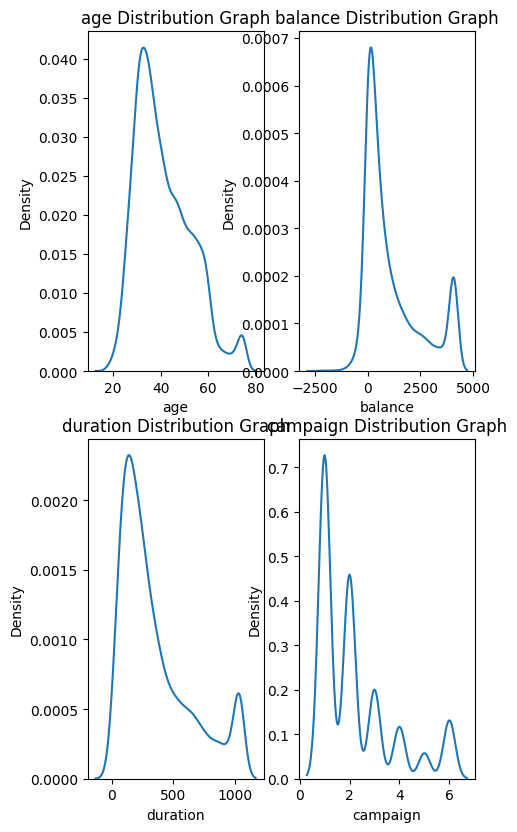

In [100]:
# Kde Plot
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(5, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} Distribution Graph")
plt.show()

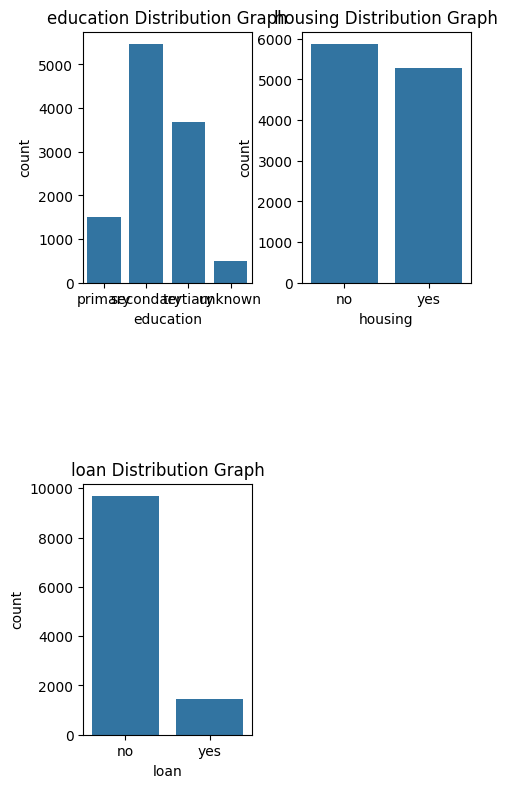

In [101]:
# Count Plot
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(5, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

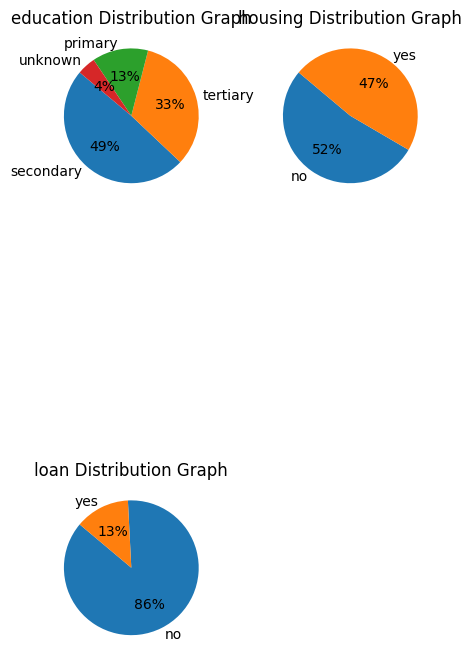

In [102]:
# Pie Plot (not recommended)
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(5, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels = categories, startangle=140, autopct='%1.1d%%')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

In [104]:
df.head(5)

,age,job,education,balance,housing,loan,duration,campaign
0,59.0,admin.,secondary,2343,yes,no,1033,1
1,56.0,admin.,secondary,45,no,no,1033,1
2,41.0,technician,secondary,1270,yes,no,1033,1
3,55.0,services,secondary,2476,yes,no,579,1
4,54.0,admin.,tertiary,184,no,no,673,2


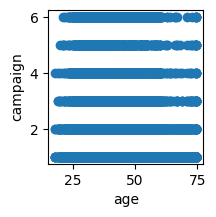

In [107]:
# Scatter Plot
plt.figure(figsize=(2, 2))
plt.scatter(df["age"], df["campaign"])
plt.xlabel("age")
plt.ylabel("campaign")
plt.show()

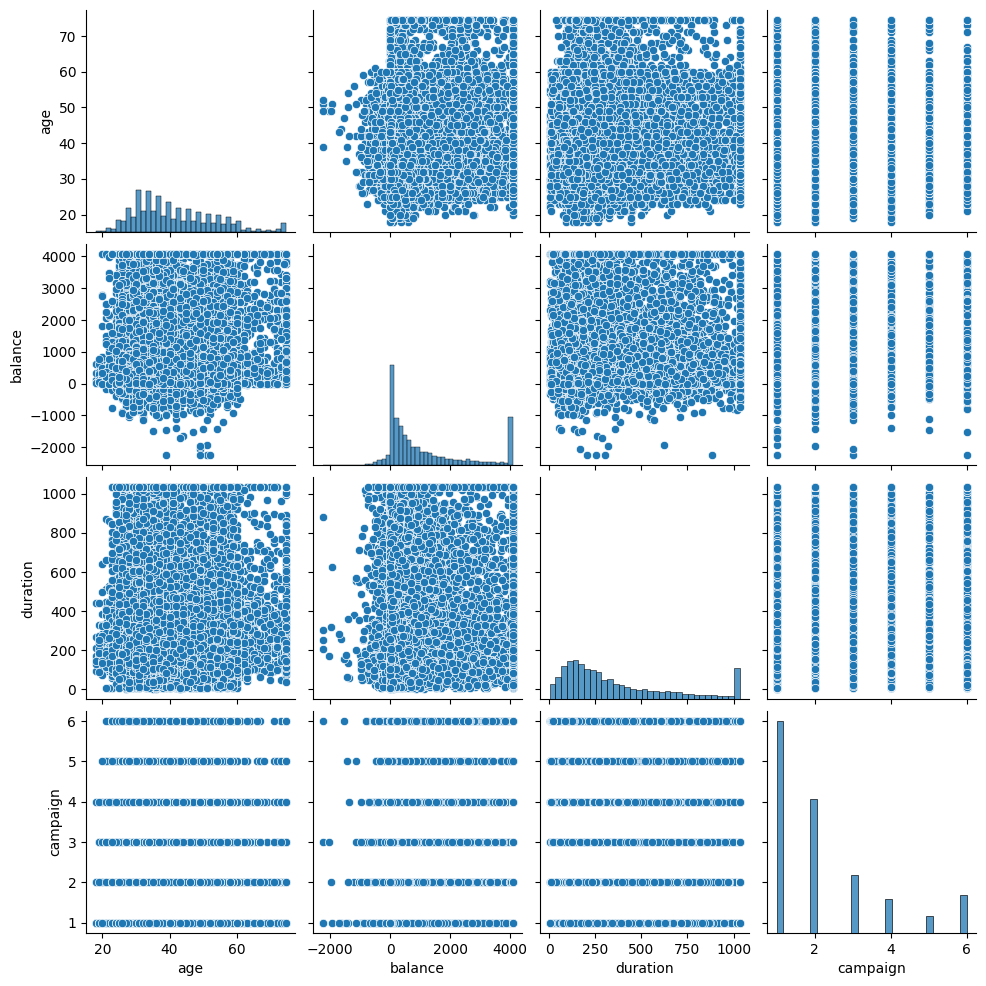

In [108]:
# Pair Plot
sns.pairplot(df)

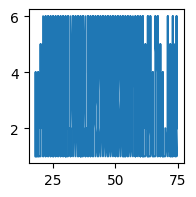

In [ ]:
# Line Plot
sorted_df = df.sort_values(by="age")
plt.figure(figsize=(2, 2))
plt.plot(sorted_df["age"], sorted_df["campaign"])
plt.show()

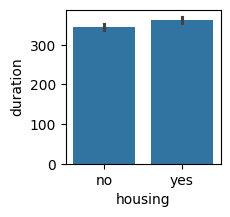

In [113]:
# bar plot
plt.figure(figsize=(2, 2))
sns.barplot(x="housing", y="duration", data=df)
plt.show()

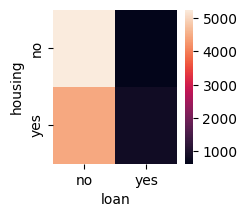

In [114]:
# Heat map
plt.figure(figsize=(2, 2))
agg = df.pivot_table(index="housing", columns="loan", values="age", aggfunc=len)
sns.heatmap(agg)
plt.show()

In [115]:
df.duplicated().sum()

np.int64(1)

In [116]:
df.drop_duplicates(inplace=True)

In [118]:
X = df.drop("age", axis=1)
y = df[["age"]]

In [121]:
from sklearn.preprocessing import MinMaxScaler


In [122]:
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

In [124]:
str_cols = ["loan", "housing"]
pd.DataFrame(X[str_cols].nunique()).T

,loan,housing
0,2,2


In [125]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)